In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook

In [2]:
def forward_euler_1D_heat(a,b,CFL,T,x=[],u0=[]):
    """solution of the 1D heat equation u_t=u_xx.
    u(0) = a, and u(1) = b are the BCs
    CFL=deltaT/(deltaX^2)
    T is the final time that the simulation will be run
    x is the pre-selected spatial variable, and should be uniformly distributed
    u0 is the initial condition, and must be the same size as x
    
    Returns an array u which is the solution at all time steps up to T
    as dictated by the time-step chosen through the specified 'CFL' number."""
    N = len(x)
    deltaX = 1/(N-1)
    deltaT = CFL*(deltaX)**2
    u = []
    u.append(u0)
    v = u0.copy() #a dummy variable for the update process
    for nn in range(1,int(T/deltaT)):
        # double check that the BCs are maintained
        v[0] = a
        v[-1] = b
        for jj in range(1,N-1):
            v[jj] = u[nn-1][jj] + CFL*(u[nn-1][jj-1]-2*u[nn-1][jj]+u[nn-1][jj+1])
        u.append(v.copy())
    return x,u

In [3]:
x=np.linspace(0,1,100)
u0 = np.sin(2*np.pi*x)
a=0
b=0
CFL=.5
T=50
x,u = forward_euler_1D_heat(a,b,CFL,T,x,u0)

<IPython.core.display.Javascript object>


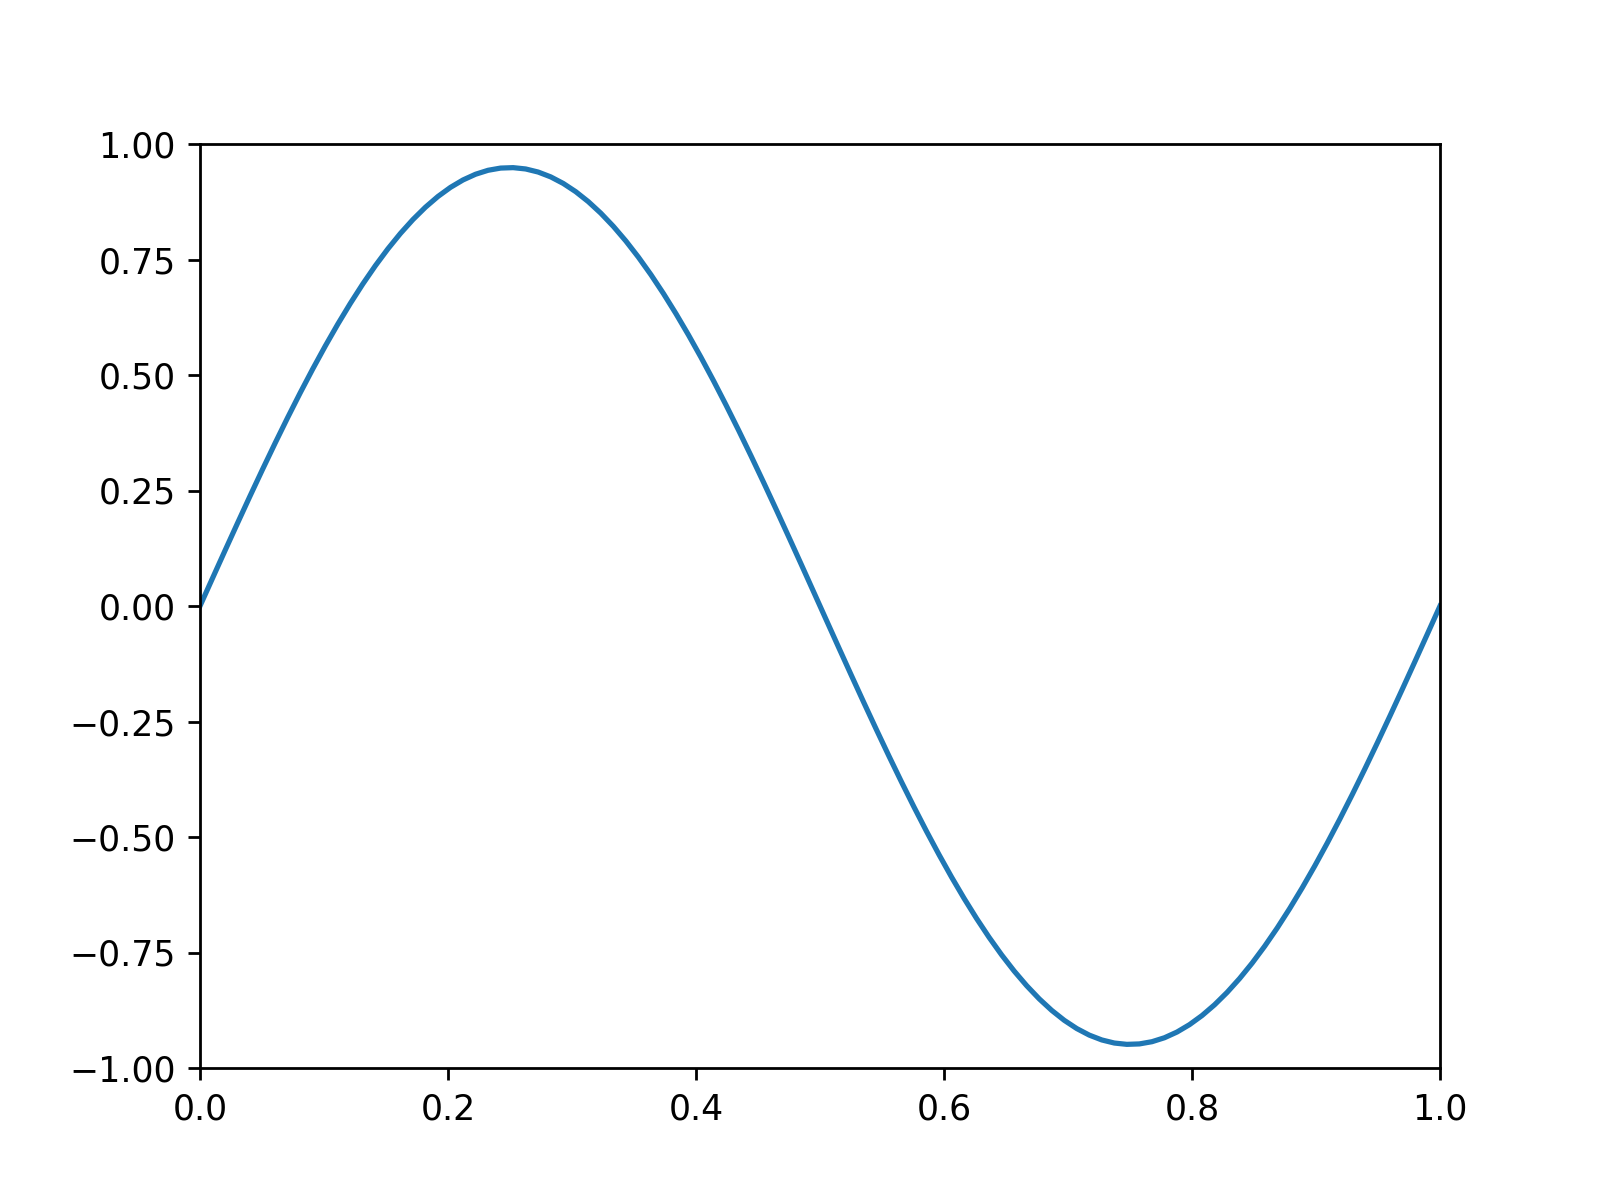

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
sol, = plt.plot([],[])

def update(i):
    sol.set_data(x,u[i])
    return sol

ani = animation.FuncAnimation(fig, update, frames=range(100), interval=20)
plt.show()

In [112]:
def forward_euler_1D_heat_array(CFL,T,x=[],u0=[]):
    """solution of the 1D heat equation u_t=u_xx.
    u(0) = 0, and u(1) = 0 are the BCs
    CFL=deltaT/(deltaX^2)
    T is the final time that the simulation will be run
    x is the pre-selected spatial variable, and should be uniformly distributed
    u0 is the initial condition, and must be the same size as x
    
    Returns an array u which is the solution at all time steps up to T
    as dictated by the time-step chosen through the specified 'CFL' number."""
    N = len(x)
    deltaX = 1/(N-1)
    deltaT = CFL*(deltaX)**2
    u = []
    u.append(u0)
    v = u0.copy() #a dummy variable for the update process
    A = np.diag(np.ones(N-3),-1)-2*np.diag(np.ones(N-2),0)+np.diag(np.ones(N-3),1)
    B = np.eye(N-2)+CFL*A
    #U(t+\Delta t) = B*U(t)
    #U(t+\Delta t) - CFL*A*U(t+\Delta t) = U(t)
    #(I-CFL*A)*U(t+\Delta t) = U(t)
    for nn in range(1,int(T/deltaT)):
        # double check that the BCs are maintained
        v[0] = 0
        v[-1] = 0
        v[1:-1] = np.matmul(B,u[nn-1][1:-1])
        u.append(v.copy())
    return x,u

In [113]:
x=np.linspace(0,1,100)
u0 = np.sin(2*np.pi*x)
CFL=0.5
x,u = forward_euler_1D_heat_array(CFL,T,x,u0)
#N = len(x)
#deltaX = 1/(N-1)
#deltaT = CFL*(deltaX)**2
#u = []
#u.append(u0)
#v = u0.copy() #a dummy variable for the update process
#A = np.diag(np.ones(N-3),-1)-2*np.diag(np.ones(N-2),0)+np.diag(np.ones(N-3),1)

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
sol, = plt.plot([],[])

def update(i):
    sol.set_data(x,u[i])
    return sol

ani = animation.FuncAnimation(fig, update, frames=range(100), interval=20)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


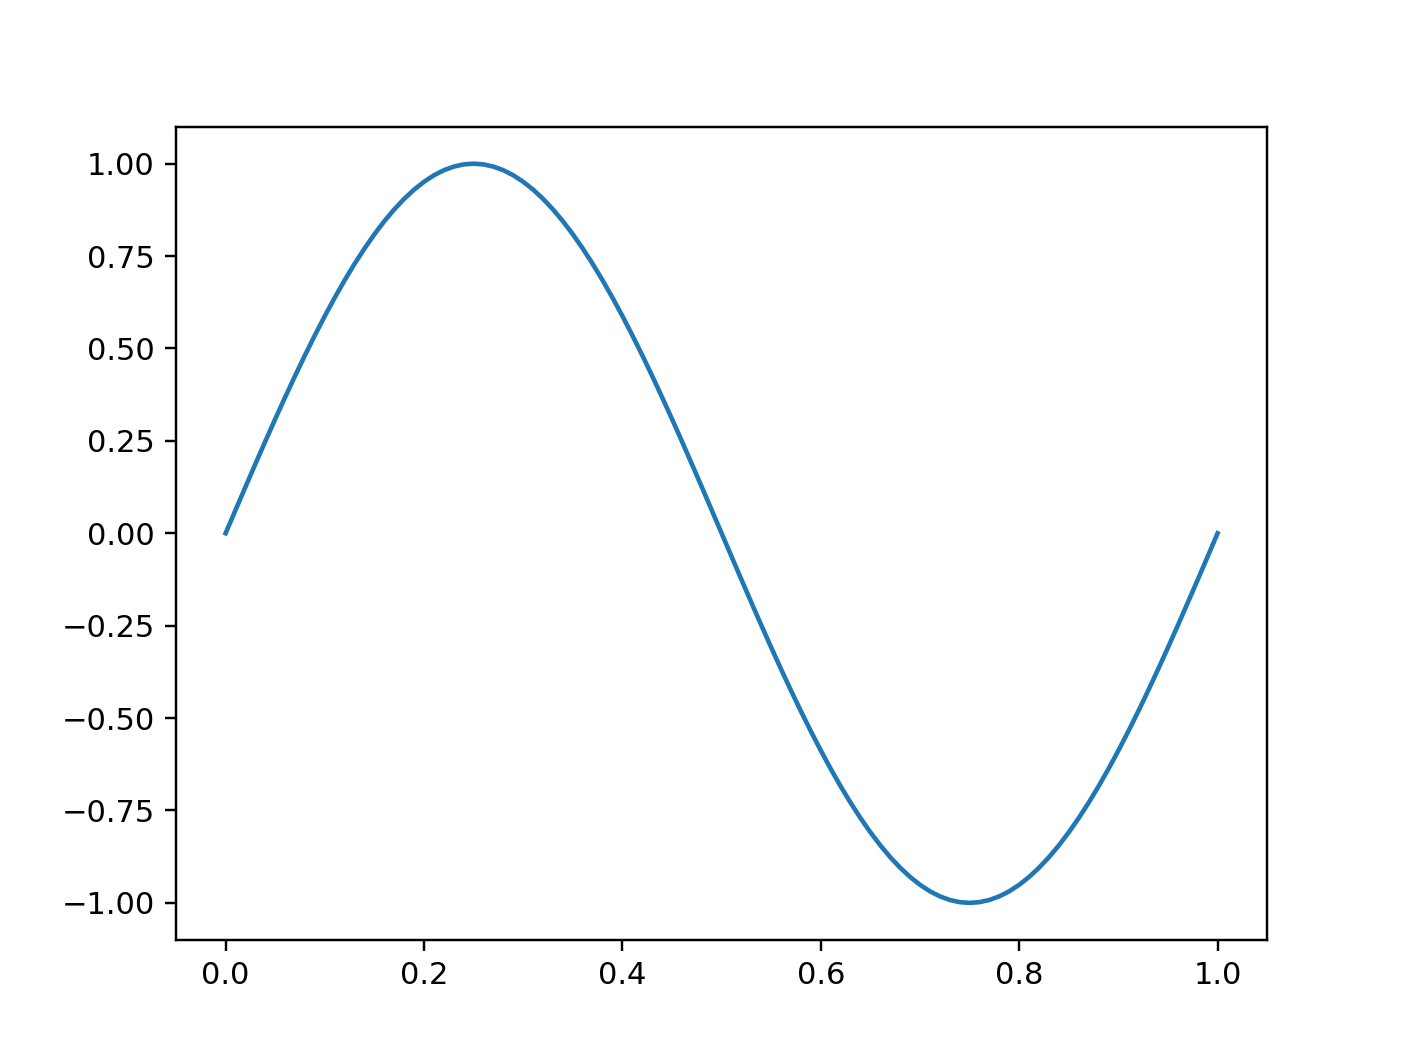

In [41]:
def backward_euler_1D_heat(a,b,CFL,T,x=[],u0=[]):
    """solution of the 1D heat equation u_t=u_xx.
    u(0) = a, and u(1) = b are the BCs
    CFL=deltaT/(deltaX^2)
    T is the final time that the simulation will be run
    x is the pre-selected spatial variable, and should be uniformly distributed
    u0 is the initial condition, and must be the same size as x
    
    Returns an array u which is the solution at all time steps up to T
    as dictated by the time-step chosen through the specified 'CFL' number."""
    N = len(x)
    deltaX = 1/(N-1)
    deltaT = CFL*(deltaX)**2
    u = []
    u.append(u0)
    v = u0.copy() #a dummy variable for the update process
    for nn in range(1,int(T/deltaT)):
        # double check that the BCs are maintained
        v[0] = a
        v[-1] = b
        for jj in range(1,N-1):
            v[jj] = u[nn-1][jj] + CFL*(u[nn-1][jj-1]-2*u[nn-1][jj]+u[nn-1][jj+1])
        u.append(v.copy())
    return x,u

In [60]:
np.diag(np.ones(5))+2*np.diag(np.ones(4),1)

array([[1., 2., 0., 0., 0.],
       [0., 1., 2., 0., 0.],
       [0., 0., 1., 2., 0.],
       [0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 1.]])

In [67]:
B=np.array([np.ones(5),2*np.ones(5),np.ones(5)])

In [68]:
B

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.]])

In [71]:
A=np.diag(B)
A

array([1., 2., 1.])

In [89]:
B=np.diag(np.ones(4),-1)-2*np.diag(np.ones(5),0)+np.diag(np.ones(4),1)

In [90]:
B

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])